In [29]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [5]:
clean_data = Path("../Managerial Econ/cleandata.csv")
cleandb= pd.read_csv(clean_data, index_col="academicyear")
cleandb

,admin_share_ru_camden,admin_share_princeton,admin_share_njit,admin_share_montclair,tuitionfee_camden,tuitionfee_princeton,tuition_njit,tuition_montclair,govt_reliance_ru_camden,govt_reliance_princeton,govt_reliance_njit,govt_reliance_montclair,grant_ru_camden,grants_princeton,grants_njit,grants_montclair
academicyear,,,,,,,,,,,,,,,,
1987,0.327624,0.332555,0.360520,0.311173,2177,11780,2712,1624,0.749995,0.360559,0.730758,0.704874,73440488,50758000,8895000,3140000
1988,0.322465,0.330554,0.383673,0.365618,2455,12550,2944,1800,0.735700,0.363151,0.693846,0.777418,74829415,53835000,6344000,5109083
1989,0.326628,0.340151,0.371343,0.374553,2628,13380,3225,1976,0.735431,0.346849,0.691141,0.772962,84546439,55570000,9519258,4563272
1990,0.316996,0.341360,0.357973,0.377848,2941,14390,3560,2168,0.716463,0.349181,0.660032,0.748385,96638000,59735000,1176112,4629838
1991,0.316147,0.340715,0.338941,0.383741,3279,15440,4000,2400,0.686529,0.346055,0.621526,0.710445,105287000,60089000,11958000,5454302
1992,0.298214,0.339535,0.341323,0.380775,3670,16570,4288,2612,0.691662,0.318994,0.636721,0.711042,121177000,63505000,12651000,5745123
1993,0.289950,0.333627,0.354937,0.376575,3857,17750,4524,2686,0.683262,0.319670,0.653678,0.699906,129318000,64372000,19480000,5709172
1994,0.279601,0.336412,0.335069,0.381329,4098,18940,4790,2844,0.688428,0.332365,0.684365,0.695562,146343000,67271000,24695000,5340556
1995,0.275350,0.337022,0.335776,0.370499,4490,19900,4980,2985,0.685893,0.345474,0.705760,0.702202,156253472,73025000,26365000,6261900


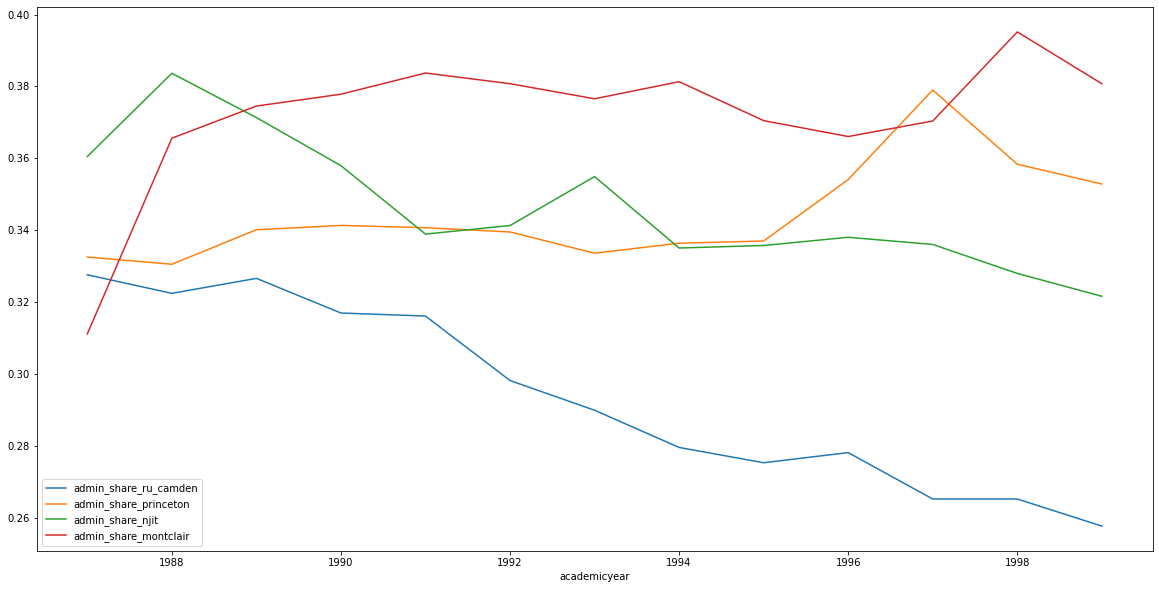

In [19]:
ax = cleandb['admin_share_ru_camden'].plot(figsize=(20,10))
cleandb['admin_share_princeton'].plot(ax=ax)
cleandb['admin_share_njit'].plot(ax=ax)
cleandb['admin_share_montclair'].plot(ax=ax)
ax.legend(['admin_share_ru_camden','admin_share_princeton','admin_share_njit','admin_share_montclair'])

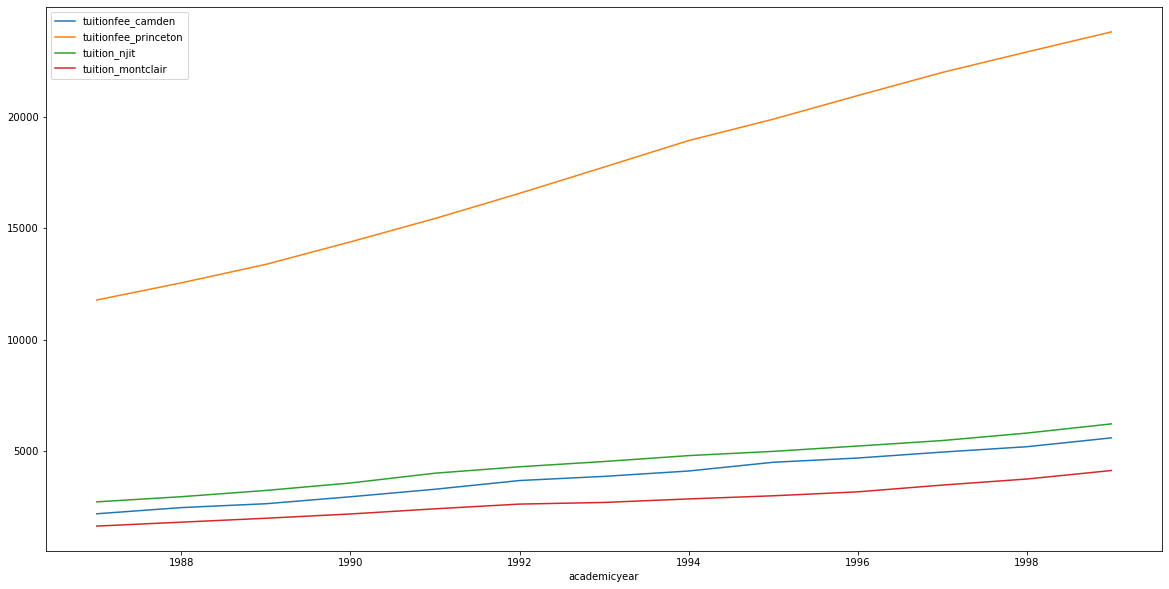

In [23]:
ax = cleandb['tuitionfee_camden'].plot(figsize=(20,10))
cleandb['tuitionfee_princeton'].plot(ax=ax)
cleandb['tuition_njit'].plot(ax=ax)
cleandb['tuition_montclair'].plot(ax=ax)
ax.legend(['tuitionfee_camden','tuitionfee_princeton','tuition_njit','tuition_montclair'])

In [28]:
correlation=cleandb.corr()
correlation


,admin_share_ru_camden,admin_share_princeton,admin_share_njit,admin_share_montclair,tuitionfee_camden,tuitionfee_princeton,tuition_njit,tuition_montclair,govt_reliance_ru_camden,govt_reliance_princeton,govt_reliance_njit,govt_reliance_montclair,grant_ru_camden,grants_princeton,grants_njit,grants_montclair
admin_share_ru_camden,1.000000,-0.643335,0.837906,-0.439254,-0.981484,-0.983308,-0.975157,-0.960853,0.868383,0.761470,0.003933,0.848032,-0.792107,-0.843820,-0.943586,-0.866561
admin_share_princeton,-0.643335,1.000000,-0.550115,0.268378,0.686664,0.702429,0.671742,0.701226,-0.611149,-0.842909,0.022827,-0.581773,0.523973,0.389509,0.675253,0.605857
admin_share_njit,0.837906,-0.550115,1.000000,-0.402239,-0.870703,-0.863475,-0.885408,-0.866619,0.841195,0.629899,0.234516,0.899903,-0.703030,-0.792749,-0.797393,-0.734559
admin_share_montclair,-0.439254,0.268378,-0.402239,1.000000,0.511872,0.498008,0.541595,0.528316,-0.635188,-0.335044,-0.683314,-0.167908,0.303241,0.474177,0.309207,0.580790
tuitionfee_camden,-0.981484,0.686664,-0.870703,0.511872,1.000000,0.998200,0.997706,0.991081,-0.897000,-0.792630,-0.102416,-0.851902,0.814715,0.888711,0.943210,0.927094
tuitionfee_princeton,-0.983308,0.702429,-0.863475,0.498008,0.998200,1.000000,0.995421,0.988161,-0.885472,-0.799763,-0.069010,-0.853387,0.820259,0.878313,0.953906,0.916325
tuition_njit,-0.975157,0.671742,-0.885408,0.541595,0.997706,0.995421,1.000000,0.992015,-0.912441,-0.785720,-0.152443,-0.858518,0.805825,0.890811,0.933188,0.923854
tuition_montclair,-0.960853,0.701226,-0.866619,0.528316,0.991081,0.988161,0.992015,1.000000,-0.917881,-0.845443,-0.143160,-0.861869,0.760606,0.885621,0.925524,0.939809
govt_reliance_ru_camden,0.868383,-0.611149,0.841195,-0.635188,-0.897000,-0.885472,-0.912441,-0.917881,1.000000,0.796524,0.407927,0.814479,-0.523819,-0.722402,-0.768790,-0.823177
govt_reliance_princeton,0.761470,-0.842909,0.629899,-0.335044,-0.792630,-0.799763,-0.785720,-0.845443,0.796524,1.000000,0.034261,0.761391,-0.433865,-0.573588,-0.769181,-0.763697


<AxesSubplot:>

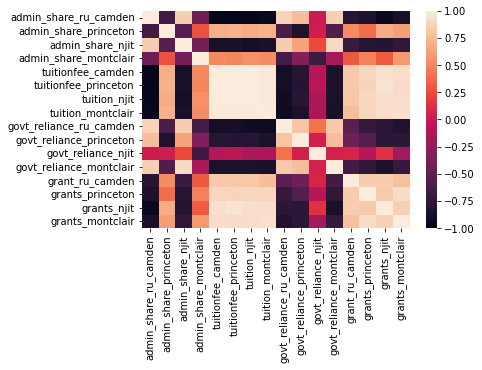

In [27]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [47]:
percentchangedb=cleandb.pct_change()
percentchangedb=percentchangedb.dropna()
percentchangedb

,admin_share_ru_camden,admin_share_princeton,admin_share_njit,admin_share_montclair,tuitionfee_camden,tuitionfee_princeton,tuition_njit,tuition_montclair,govt_reliance_ru_camden,govt_reliance_princeton,govt_reliance_njit,govt_reliance_montclair,grant_ru_camden,grants_princeton,grants_njit,grants_montclair
academicyear,,,,,,,,,,,,,,,,
1988,-0.015746,-0.006018,0.064220,0.174967,0.127699,0.065365,0.085546,0.108374,-0.019059,0.007191,-0.050512,0.102918,0.018912,0.060621,-0.286790,0.627096
1989,0.012910,0.029033,-0.032135,0.024437,0.070468,0.066135,0.095448,0.097778,-0.000366,-0.044892,-0.003900,-0.005732,0.129856,0.032228,0.500514,-0.106831
1990,-0.029489,0.003555,-0.036005,0.008798,0.119102,0.075486,0.103876,0.097166,-0.025792,0.006723,-0.045010,-0.031796,0.143017,0.074951,-0.876449,0.014587
1991,-0.002680,-0.001890,-0.053166,0.015596,0.114927,0.072967,0.123596,0.107011,-0.041780,-0.008951,-0.058339,-0.050696,0.089499,0.005926,9.167399,0.178076
1992,-0.056722,-0.003464,0.007026,-0.007729,0.119244,0.073187,0.072000,0.088333,0.007477,-0.078199,0.024448,0.000841,0.150921,0.056849,0.057953,0.053320
1993,-0.027713,-0.017399,0.039886,-0.011030,0.050954,0.071213,0.055037,0.028331,-0.012146,0.002120,0.026632,-0.015661,0.067183,0.013652,0.539799,-0.006258
1994,-0.035690,0.008348,-0.055975,0.012624,0.062484,0.067042,0.058798,0.058824,0.007561,0.039712,0.046944,-0.006206,0.131652,0.045035,0.267710,-0.064566
1995,-0.015206,0.001814,0.002108,-0.028400,0.095656,0.050686,0.039666,0.049578,-0.003682,0.039443,0.031262,0.009546,0.067721,0.085535,0.067625,0.172518
1996,0.010234,0.050709,0.006788,-0.011920,0.042539,0.053266,0.048193,0.059296,0.036587,-0.145340,-0.007405,-0.015742,0.579991,0.073686,0.270965,0.179782


In [46]:
y = percentchangedb['tuitionfee_camden']
X = percentchangedb[['admin_share_ru_camden', 'govt_reliance_ru_camden','grant_ru_camden',]]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

C:\Users\jleon\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jleon\anaconda3\envs\dev\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      tuitionfee_camden   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                 -0.136
Method:                 Least Squares   F-statistic:                    0.5602
Date:                Mon, 13 Dec 2021   Prob (F-statistic):              0.656
Time:                        09:45:20   Log-Likelihood:                 26.130
No. Observations:                  12   AIC:                            -44.26
Df Residuals:                       8   BIC:                            -42.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0532      0.026      2.061      0.073      -0.006       0.113
admin_share_ru_camden      -0.4964      0.538     -0.922      0.384      -1.738       0.745
govt_reliance_ru_camden    -0.7747      0.752     -1.030      0.333      -2.509       0.959
grant_ru_camden             0.1013      0.105      0.961      0.365      -0.142       0.344
==============================================================================
Omnibus:                        1.291   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.762
Skew:                           0.148   Prob(JB):                        0.683
Kurtosis:                       1.802   Cond. No.                         79.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
y = percentchangedb['tuition_njit']
X = percentchangedb[['admin_share_njit', 'govt_reliance_njit','grants_njit',]]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

C:\Users\jleon\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jleon\anaconda3\envs\dev\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tuition_njit   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     4.355
Date:                Mon, 13 Dec 2021   Prob (F-statistic):             0.0427
Time:                        09:47:35   Log-Likelihood:                 33.280
No. Observations:                  12   AIC:                            -58.56
Df Residuals:                       8   BIC:                            -56.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0653      0.006     11.467      0.000       0.052       0.078
admin_share_njit      -0.1674      0.170     -0.985      0.353      -0.559       0.224
govt_reliance_njit    -0.4223      0.179     -2.365      0.046      -0.834      -0.010
grants_njit            0.0026      0.002      1.043      0.327      -0.003       0.008
==============================================================================
Omnibus:                        1.723   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                0.910
Skew:                          -0.255   Prob(JB):                        0.634
Kurtosis:                       1.751   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
y = percentchangedb['tuitionfee_princeton']
X = percentchangedb[['admin_share_princeton', 'govt_reliance_princeton','grants_princeton',]]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

C:\Users\jleon\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jleon\anaconda3\envs\dev\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     tuitionfee_princeton   R-squared:                       0.691
Model:                              OLS   Adj. R-squared:                  0.575
Method:                   Least Squares   F-statistic:                     5.951
Date:                  Mon, 13 Dec 2021   Prob (F-statistic):             0.0196
Time:                          09:49:14   Log-Likelihood:                 42.771
No. Observations:                    12   AIC:                            -77.54
Df Residuals:                         8   BIC:                            -75.60
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0752      0.004     17.012      0.000       0.065       0.085
admin_share_princeton       0.0126      0.131      0.096      0.926      -0.288       0.314
govt_reliance_princeton     0.0786      0.020      3.849      0.005       0.031       0.126
grants_princeton           -0.1688      0.046     -3.660      0.006      -0.275      -0.062
==============================================================================
Omnibus:                        2.287   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                0.596
Skew:                           0.506   Prob(JB):                        0.742
Kurtosis:                       3.408   Cond. No.                         54.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
y = percentchangedb['tuition_montclair']
X = percentchangedb[['admin_share_montclair', 'govt_reliance_montclair','grants_montclair']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

C:\Users\jleon\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jleon\anaconda3\envs\dev\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      tuition_montclair   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.8245
Date:                Mon, 13 Dec 2021   Prob (F-statistic):              0.516
Time:                        09:51:50   Log-Likelihood:                 28.911
No. Observations:                  12   AIC:                            -49.82
Df Residuals:                       8   BIC:                            -47.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0719      0.011      6.432      0.000       0.046       0.098
admin_share_montclair       0.2963      0.222      1.332      0.219      -0.217       0.809
govt_reliance_montclair    -0.2953      0.332     -0.890      0.399      -1.060       0.470
grants_montclair            0.0133      0.061      0.218      0.833      -0.127       0.154
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.766
Skew:                          -0.497   Prob(JB):                        0.682
Kurtosis:                       2.262   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""